<a href="https://colab.research.google.com/github/gopi720724/Machine-Learning-Project/blob/main/CRAB_AGE_PREDICTION_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor
from lightgbm import early_stopping
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

In [ ]:
df_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [ ]:
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


# Data Analysis

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [ ]:
df_train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [ ]:
df_train.isnull().sum()

,0
id,0
Sex,0
Length,0
Diameter,0
Height,0
Weight,0
Shucked Weight,0
Viscera Weight,0
Shell Weight,0
Age,0


In [ ]:
df_train["Sex"].value_counts()

,count
Sex,
M,27084
I,23957
F,23010


In [ ]:
df_test.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,14251.458382,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,74051.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,86392.750000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,98734.500000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,111076.250000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,123418.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 2   Length          49368 non-null  float64
 3   Diameter        49368 non-null  float64
 4   Height          49368 non-null  float64
 5   Weight          49368 non-null  float64
 6   Shucked Weight  49368 non-null  float64
 7   Viscera Weight  49368 non-null  float64
 8   Shell Weight    49368 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.4+ MB


In [ ]:
df_test.isnull().sum()

,0
id,0
Sex,0
Length,0
Diameter,0
Height,0
Weight,0
Shucked Weight,0
Viscera Weight,0
Shell Weight,0


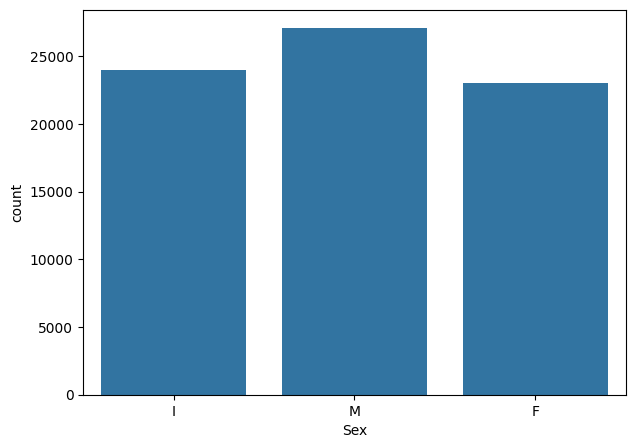

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_train,x="Sex")
plt.show()

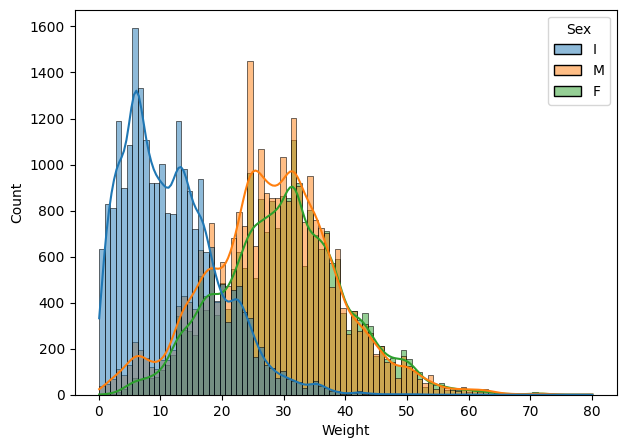

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=df_train, x="Weight",hue="Sex",kde=True)
plt.show()

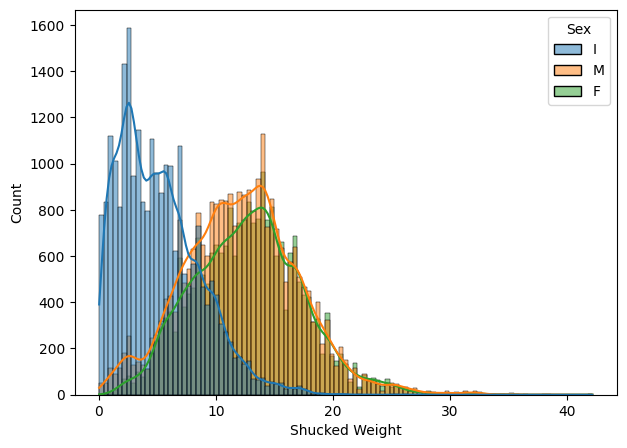

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=df_train, x="Shucked Weight",hue="Sex",kde=True)
plt.show()

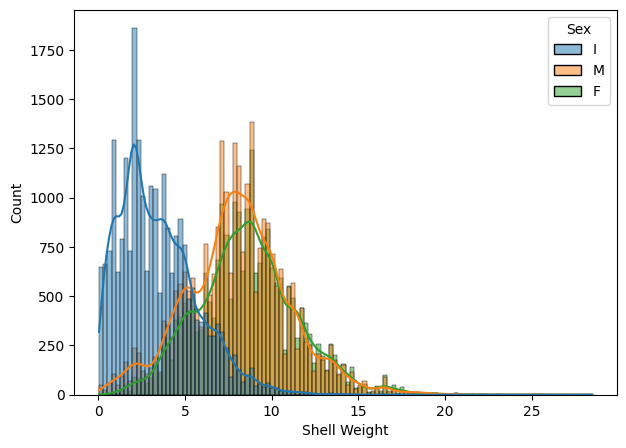

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=df_train, x="Shell Weight",hue="Sex",kde=True)
plt.show()

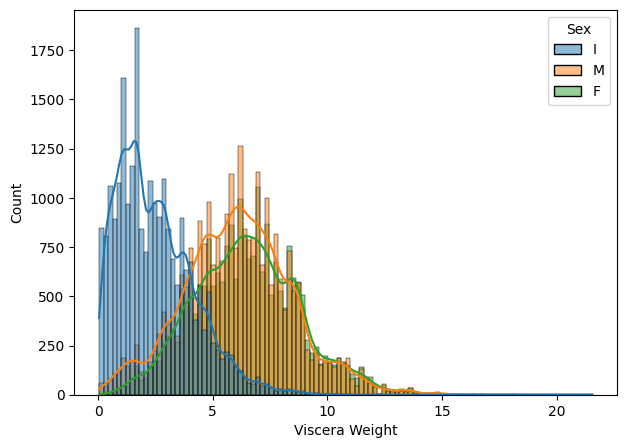

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=df_train, x="Viscera Weight",hue="Sex",kde=True)
plt.show()

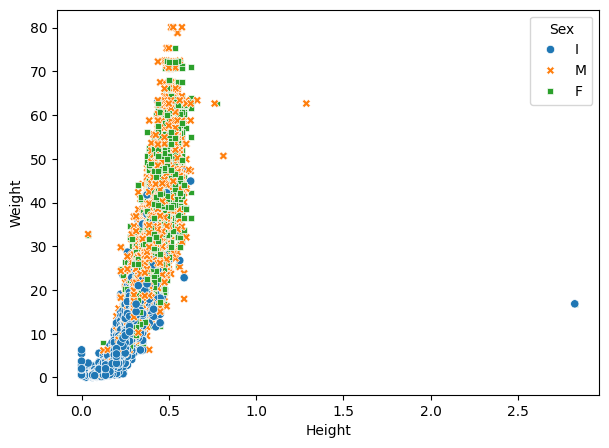

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_train, x="Height", y="Weight", hue="Sex", style="Sex")
plt.show()

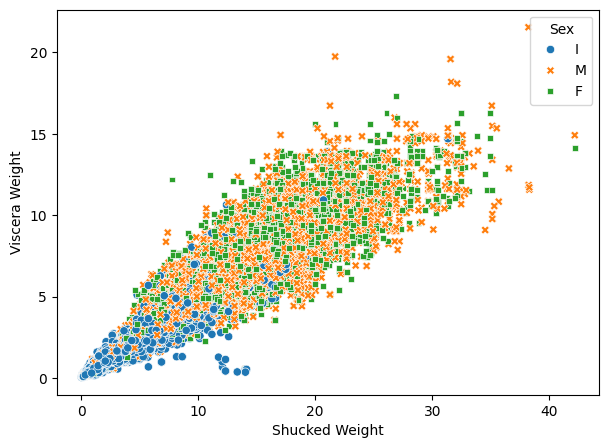

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_train, x="Shucked Weight", y="Viscera Weight", hue="Sex", style="Sex")
plt.show()

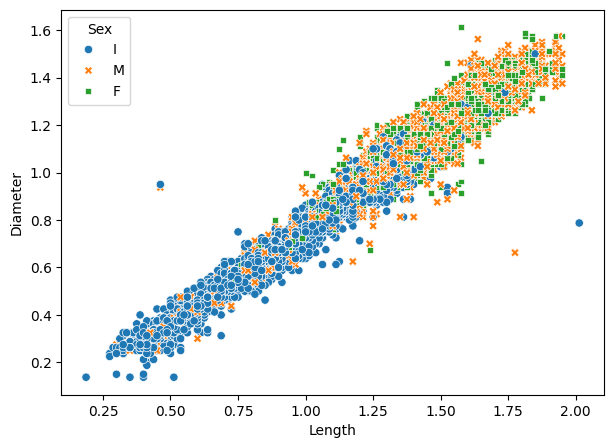

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_train, x="Length", y="Diameter", hue="Sex", style="Sex")
plt.show()

In [ ]:
label_encoder = LabelEncoder()
df_train["Sex"]=label_encoder.fit_transform(df_train["Sex"])
df_train.drop("id",axis=1,inplace=True)
df_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


# Before Removing Outliers

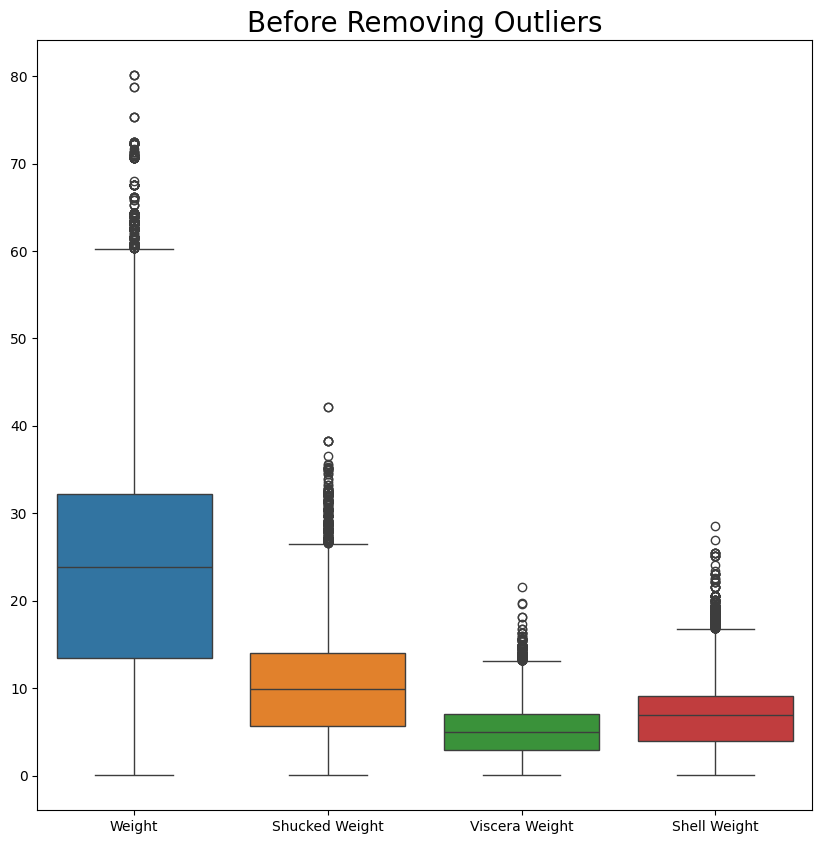

In [ ]:
col_scale = ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
plt.figure(figsize=(10,10))
sns.boxplot(data=df_train[col_scale])
plt.title("Before Removing Outliers",fontsize=20)
plt.show()

# Apply Z_Score Method

### Weight Column

In [ ]:
print("Mean value of Weight",df_train['Weight'].mean())
print("Standard deviation of Weight",df_train['Weight'].std())
print("Minimum value of Weight",df_train['Weight'].min())
print("Maximum value of Weight",df_train['Weight'].max())

Mean value of Weight 23.385216972918357
Standard deviation of Weight 12.648153002843213
Minimum value of Weight 0.056699
Maximum value of Weight 80.10151225


In [ ]:
upper_limit=df_train['Weight'].mean() + 3*df_train['Weight'].std()
lower_limit=df_train['Weight'].mean() - 3*df_train['Weight'].std()
print("Upper Limit is :",upper_limit)
print("Lower Limit is :",lower_limit)

Upper Limit is : 61.32967598144799
Lower Limit is : -14.559242035611277


# Find The Outliers

In [ ]:
df_train[(df_train['Weight'] >= upper_limit) | (df_train['Weight'] <= lower_limit)]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
141,2,1.8500,1.4375,0.4625,62.397250,30.092994,14.840963,14.982711,13
371,0,1.7750,1.4125,0.5125,64.339190,20.680960,11.538246,17.009700,11
1504,0,1.8000,1.4500,0.5375,62.652395,30.348140,10.857859,14.203100,12
1755,0,1.8375,1.4125,0.5250,64.339190,32.049110,11.495722,18.512224,15
2244,2,1.8125,1.4250,0.4750,72.291225,30.348140,13.692808,20.553387,13
...,...,...,...,...,...,...,...,...,...
72717,2,1.8750,1.5000,0.5000,62.652395,33.920177,13.962129,18.016107,12
72780,2,1.8125,1.4125,0.4750,66.068510,35.521923,15.337079,14.741740,11
72788,2,1.8000,1.3750,0.5125,63.375307,31.340372,14.883487,16.867953,11
73664,2,1.8375,1.4250,0.7625,62.652395,29.809499,11.708343,14.174750,12


# Apply Trimming

In [ ]:
trim_df = df_train[(df_train['Weight'] >= lower_limit) & (df_train["Weight"] <= upper_limit)]
df_train["Weight"]=trim_df["Weight"]
print("Before Triming :",len(df_train))
print("After Triming :",len(trim_df))
print("Outliers :",len(df_train)-len(trim_df))

Before Triming : 74051
After Triming : 73852
Outliers : 199


# Shucked Weight Column

In [ ]:
print("Mean value of Shucked Weight",df_train['Shucked Weight'].mean())
print("Standard deviation of Shucked Weight",df_train['Shucked Weight'].std())
print("Minimum value of Shucked Weight",df_train['Shucked Weight'].min())
print("Maximum value of Shucked Weight",df_train['Shucked Weight'].max())

Mean value of Shucked Weight 10.104269739832008
Standard deviation of Shucked Weight 5.618025350822557
Minimum value of Shucked Weight 0.0283495
Maximum value of Shucked Weight 42.184056


In [ ]:
upper_limit=df_train['Shucked Weight'].mean() + 3*df_train['Shucked Weight'].std()
lower_limit=df_train['Shucked Weight'].mean() - 3*df_train['Shucked Weight'].std()
print("Upper Limit is :",upper_limit)
print("Lower Limit is :",lower_limit)

Upper Limit is : 26.95834579229968
Lower Limit is : -6.749806312635664


# Find The Outliers

In [ ]:
df_train.loc[(df_train["Shucked Weight"]>=upper_limit) | (df_train["Shucked Weight"]<=lower_limit)]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
53,0,1.6375,1.4625,0.5000,60.965600,27.867559,10.517665,12.048538,11
141,2,1.8500,1.4375,0.4625,NaN,30.092994,14.840963,14.982711,13
245,0,1.7750,1.4250,0.4875,56.146185,29.100762,13.962129,13.607760,12
442,2,1.8500,1.5000,0.5000,59.618998,29.100762,10.460966,15.237856,12
869,2,1.7375,1.4625,0.5000,60.214338,26.988724,11.793392,16.726205,15
...,...,...,...,...,...,...,...,...,...
72780,2,1.8125,1.4125,0.4750,NaN,35.521923,15.337079,14.741740,11
72788,2,1.8000,1.3750,0.5125,NaN,31.340372,14.883487,16.867953,11
73165,0,1.6750,1.3125,0.4500,43.176288,27.371442,9.171063,11.339800,9
73664,2,1.8375,1.4250,0.7625,NaN,29.809499,11.708343,14.174750,12


# Apply Trimming Delete Outliers

In [ ]:
trim_df0=df_train.loc[(df_train["Shucked Weight"]<=upper_limit) & (df_train["Shucked Weight"]>=lower_limit)]
df_train["Shucked Weight"]=trim_df0["Shucked Weight"]
print("Before Triming :",len(df_train))
print("After Triming :",len(trim_df0))
print("Outliers :",len(df_train)-len(trim_df0))

Before Triming : 74051
After Triming : 73782
Outliers : 269


# Viscera Weight Column

In [ ]:
print("Mean value of Viscera Weight",df_train['Viscera Weight'].mean())
print("Standard deviation of Viscera Weight",df_train['Viscera Weight'].std())
print("Minimum value of Viscera Weight",df_train['Viscera Weight'].min())
print("Maximum value of Viscera Weight",df_train['Viscera Weight'].max())

Mean value of Viscera Weight 5.058385996246506
Standard deviation of Viscera Weight 2.7927287058161685
Minimum value of Viscera Weight 0.04252425
Maximum value of Viscera Weight 21.54562


In [ ]:
upper_limit=df_train['Viscera Weight'].mean() + 3*df_train['Viscera Weight'].std()
lower_limit=df_train['Viscera Weight'].mean() - 3*df_train['Viscera Weight'].std()
print("Upper Limit is :",upper_limit)
print("Lower Limit is :",lower_limit)

Upper Limit is : 13.43657211369501
Lower Limit is : -3.3198001212019994


# Find The Outliers For Viscera Weight

In [ ]:
df_train.loc[(df_train["Viscera Weight"]>=upper_limit) | (df_train["Viscera Weight"]<=lower_limit)]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
141,2,1.8500,1.4375,0.4625,NaN,NaN,14.840963,14.982711,13
245,0,1.7750,1.4250,0.4875,56.146185,NaN,13.962129,13.607760,12
804,0,1.7500,1.4375,0.4750,49.228907,22.807173,13.551061,14.174750,11
1223,2,1.7500,1.2875,0.4625,50.561333,23.997852,14.840963,12.459605,10
1602,0,1.8750,1.4000,0.5375,54.941331,21.928338,13.678634,16.300963,12
...,...,...,...,...,...,...,...,...,...
72717,2,1.8750,1.5000,0.5000,NaN,NaN,13.962129,18.016107,12
72780,2,1.8125,1.4125,0.4750,NaN,NaN,15.337079,14.741740,11
72788,2,1.8000,1.3750,0.5125,NaN,NaN,14.883487,16.867953,11
73390,2,1.8125,1.3250,0.5500,58.754339,22.651250,13.621935,16.612807,15


In [ ]:
trim_df1=df_train.loc[(df_train["Viscera Weight"]<=upper_limit) & (df_train["Viscera Weight"]>=lower_limit)]
df_train["Viscera Weight"]=trim_df1["Viscera Weight"]
print("Before Triming :",len(df_train))
print("After Triming :",len(trim_df1))
print("Outliers :",len(df_train)-len(trim_df1))

Before Triming : 74051
After Triming : 73850
Outliers : 201


# Shell Weight Column

In [ ]:
print("Mean value of Shell Weight",df_train['Shell Weight'].mean())
print("Standard deviation of Shell Weight",df_train['Shell Weight'].std())
print("Minimum value of Viscera Shell Weight",df_train['Shell Weight'].min())
print("Maximum value of Viscera Shell Weight",df_train['Shell Weight'].max())

Mean value of Shell Weight 6.723870114695852
Standard deviation of Shell Weight 3.584372100397152
Minimum value of Viscera Shell Weight 0.04252425
Maximum value of Viscera Shell Weight 28.4912475


In [ ]:
upper_limit=df_train['Shell Weight'].mean() + 3*df_train['Shell Weight'].std()
lower_limit=df_train['Shell Weight'].mean() - 3*df_train['Shell Weight'].std()
print("Upper Limit is :",upper_limit)
print("Lower Limit is :",lower_limit)

Upper Limit is : 17.476986415887307
Lower Limit is : -4.029246186495604


# Find Outlirs For Shell Weight Column

In [ ]:
df_train.loc[(df_train["Shell Weight"]>=upper_limit) | (df_train["Shell Weight"]<=lower_limit)]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
100,0,1.8000,1.4125,0.4750,55.961913,18.639796,12.686401,23.104843,14
1000,0,1.7000,1.4250,0.5125,52.219779,17.718438,11.566596,18.427175,19
1006,2,1.7500,1.4375,0.5375,49.342305,17.732612,10.163296,17.718438,16
1251,2,1.8375,1.2625,0.5125,55.352399,20.978630,13.295915,23.430862,14
1755,0,1.8375,1.4125,0.5250,NaN,NaN,11.495722,18.512224,15
...,...,...,...,...,...,...,...,...,...
72853,2,1.6375,1.2875,0.4625,48.931237,15.039410,9.100190,18.427175,21
73065,0,1.7750,1.4000,0.4875,60.072590,23.317464,11.864266,22.112610,13
73316,2,1.7625,1.4125,0.5375,58.768513,21.729892,10.602713,18.852418,11
73719,0,1.7500,1.3625,0.5750,49.668324,21.729892,8.207180,23.104843,11


In [ ]:
trim_df2=df_train.loc[(df_train["Shell Weight"]<=upper_limit) & (df_train["Shell Weight"]>=lower_limit)]
df_train["Shell Weight"]=trim_df2["Shell Weight"]
print("Before Triming :",len(df_train))
print("After Triming :",len(trim_df2))
print("Outliers :",len(df_train)-len(trim_df2))

Before Triming : 74051
After Triming : 73779
Outliers : 272


# After Removing Outliers

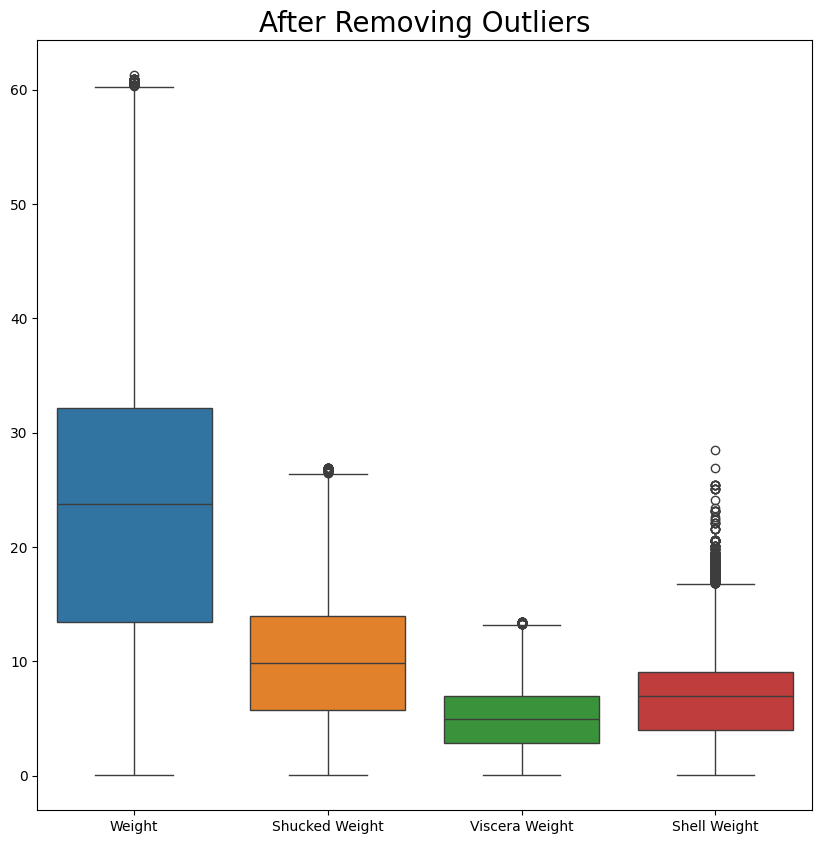

In [ ]:
col_scale = ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
plt.figure(figsize=(10,10))
sns.boxplot(data=df_train[col_scale])
plt.title("After Removing Outliers",fontsize=20)
plt.show()

# Fill Null Values

In [ ]:
mean_value0 = df_train['Weight'].mean()
df_train["Weight"].fillna(mean_value0, inplace=True)
mean_value1 = df_train['Shucked Weight'].mean()
df_train["Shucked Weight"].fillna(mean_value1, inplace=True)

<ipython-input-21-ac61a52339fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Weight"].fillna(mean_value0, inplace=True)
<ipython-input-21-ac61a52339fe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
mean_value2 = df_train['Viscera Weight'].mean()
df_train["Viscera Weight"].fillna(mean_value2, inplace=True)
mean_value3 = df_train['Shell Weight'].mean()
df_train["Shell Weight"].fillna(mean_value3, inplace=True)

<ipython-input-22-2caaa444c77a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Viscera Weight"].fillna(mean_value2, inplace=True)
<ipython-input-22-2caaa444c77a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
df_train.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Weight,0
Shucked Weight,0
Viscera Weight,0
Shell Weight,0
Age,0


In [ ]:
df_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


# Train aNd Label Data

In [ ]:
col_scale = ["Sex",'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
train_data=df_train[col_scale]

In [ ]:
label_data=df_train["Age"]

# Split Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data,test_size=0.2,random_state=42)

# LinearRegression Model

In [ ]:
ln_model=LinearRegression()
ln_model.fit(X_train,Y_train)


LinearRegression()

# MSE,MAE,R2_SCORE_LinearRegressionModel

In [ ]:
ln_pred=ln_model.predict(X_test)
mse = mean_squared_error(Y_test,ln_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(Y_test,ln_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(Y_test,ln_pred)
print("R2 Score:", r2)

Mean Squared Error: 4.876539931664907
Mean Absolute Error: 1.5328734406377826
R2 Score: 0.5215122468327161


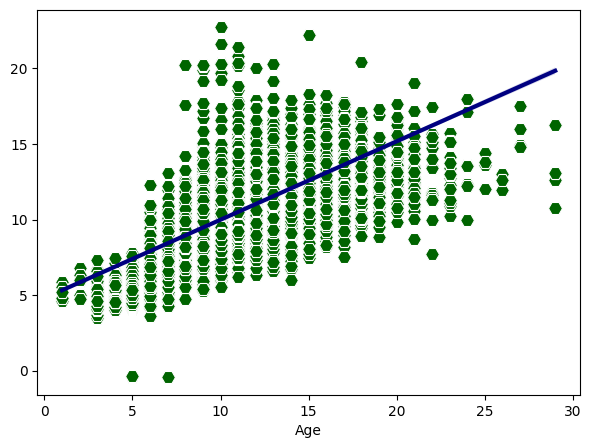

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=ln_pred,color="navy",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=ln_pred,color="darkgreen",marker="H",s=100)

plt.show()

# RandomForestRegressor Model

In [ ]:
random_regr= RandomForestRegressor(random_state=0)
random_regr.fit(X_train,Y_train)


RandomForestRegressor(random_state=0)

# MSE,MAE,R2 Score_RandomForestRegressor

In [ ]:
rfr_pred=random_regr.predict(X_test)
mse1 = mean_squared_error(Y_test,rfr_pred)
print("Mean Squared Error:", mse1)
mae1= mean_absolute_error(Y_test,rfr_pred)
print("Mean Absolute Error:", mae1)
r21 = r2_score(Y_test,rfr_pred)
print("R2 Score:", r21)

Mean Squared Error: 4.400939504422389
Mean Absolute Error: 1.4651164674903787
R2 Score: 0.5681783221700667


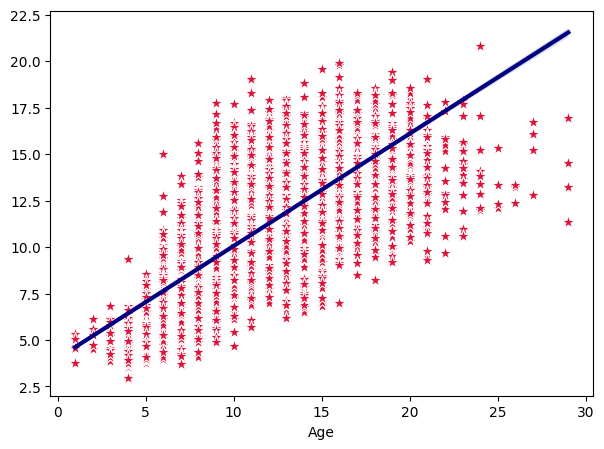

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=rfr_pred,color="navy",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=rfr_pred,color="crimson",marker="*",s=100)

plt.show()

# XGBRegressor Model

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# MSE,MAE,R2_XGBRegressor Model

In [ ]:
xgb_pred=xgb.predict(X_test)
mse3 = mean_squared_error(Y_test,xgb_pred)
print("Mean Squared Error:", mse3)
mae3= mean_absolute_error(Y_test,xgb_pred)
print("Mean Absolute Error:", mae3)
r23 = r2_score(Y_test,xgb_pred)
print("R2 Score:", r23)

Mean Squared Error: 4.258937951893115
Mean Absolute Error: 1.420413824090693
R2 Score: 0.5821114778518677


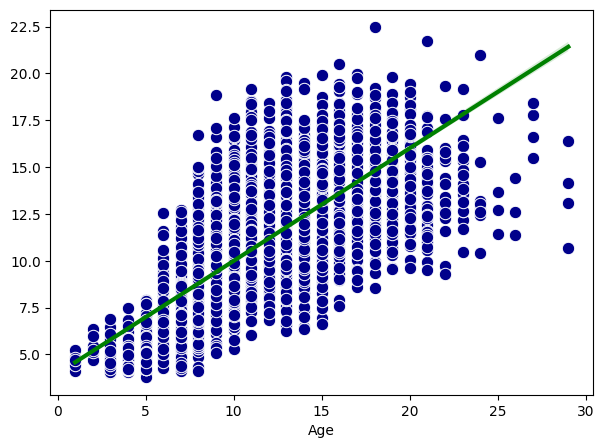

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=xgb_pred,color="green",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=xgb_pred,color="darkblue",marker="o",s=80)

plt.show()

# LGB Model

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse','mae'],
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [ ]:
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)
callbacks = [lgb.early_stopping(40),lgb.log_evaluation()]
lgb_model = lgb.train(params,train_set=lgb_train,valid_sets=[lgb_train, lgb_eval],callbacks=callbacks)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[1]	training's rmse: 3.08684	training's l1: 2.25576	valid_1's rmse: 3.10717	valid_1's l1: 2.27818
Training until validation scores don't improve for 40 rounds
[2]	training's rmse: 3.00932	training's l1: 2.2005	valid_1's rmse: 3.02814	valid_1's l1: 2.22112
[3]	training's rmse: 2.93682	training's l1: 2.14714	valid_1's rmse: 2.95452	valid_1's l1: 2.16628
[4]	training's rmse: 2.87011	training's l1: 2.09752	valid_1's rmse: 2.88663	valid_1's l1: 2.11527
[5]	training's rmse: 2.80743	training's l1: 2.04941	valid_1's rmse: 2.82284	valid_1's l1: 2.06607
[6]	training's rmse: 2.74927	training's l1: 2.00411	valid_1's rmse: 2.76413	valid_1's l1: 2.02002
[7]	training's rmse: 2.69921	training's l1: 1.96428	valid_1's rmse: 2.71345	valid_1's l1: 1.97971
[8]	training's rmse: 2.65155	training's l1: 1.92592	valid_1's rmse: 2.66546	valid_1's l1: 1.94

In [ ]:
lgb_pred=lgb_model.predict(X_test)
mse5 = mean_squared_error(Y_test,lgb_pred)
print("Mean Squared Error:", mse5)
mae5= mean_absolute_error(Y_test,lgb_pred)
print("Mean Absolute Error:", mae5)
r25 = r2_score(Y_test,lgb_pred)
print("R2 Score:", r25)

Mean Squared Error: 4.175620488488737
Mean Absolute Error: 1.411501400985329
R2 Score: 0.5902867004855803


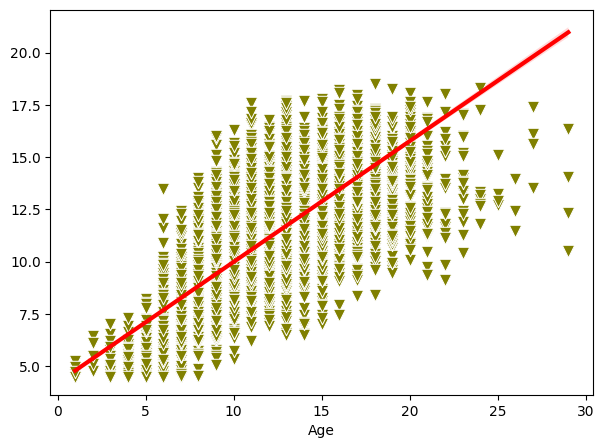

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=lgb_pred,color="red",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=lgb_pred,color="olive",marker="v",s=80)

plt.show()

# Create CatBoost Model

In [ ]:
cat_model = CatBoostRegressor(iterations=1000,loss_function='RMSE',learning_rate=0.1,depth=6,
                              random_seed=42,l2_leaf_reg=3)

cat_model.fit( X_train, Y_train,eval_set=(X_test, Y_test), early_stopping_rounds=100,verbose=100)

0:	learn: 3.0344511	test: 3.0541869	best: 3.0541869 (0)	total: 105ms	remaining: 1m 44s
100:	learn: 2.0470476	test: 2.0593941	best: 2.0593941 (100)	total: 3s	remaining: 26.7s
200:	learn: 2.0104196	test: 2.0437314	best: 2.0437314 (200)	total: 4.24s	remaining: 16.9s
300:	learn: 1.9806152	test: 2.0376217	best: 2.0376217 (300)	total: 5.17s	remaining: 12s
400:	learn: 1.9565543	test: 2.0346735	best: 2.0346735 (400)	total: 6.09s	remaining: 9.11s
500:	learn: 1.9366306	test: 2.0338339	best: 2.0337033 (498)	total: 7.03s	remaining: 7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 2.033703286
bestIteration = 498

Shrink model to first 499 iterations.


In [ ]:
cat_pred=cat_model.predict(X_test)
mse6 = mean_squared_error(Y_test,cat_pred)
print("Mean Squared Error:", mse6)
mae6= mean_absolute_error(Y_test,cat_pred)
print("Mean Absolute Error:", mae6)
r26 = r2_score(Y_test,cat_pred)
print("R2 Score:", r26)

Mean Squared Error: 4.135949057380328
Mean Absolute Error: 1.4066070656771343
R2 Score: 0.594179274770215


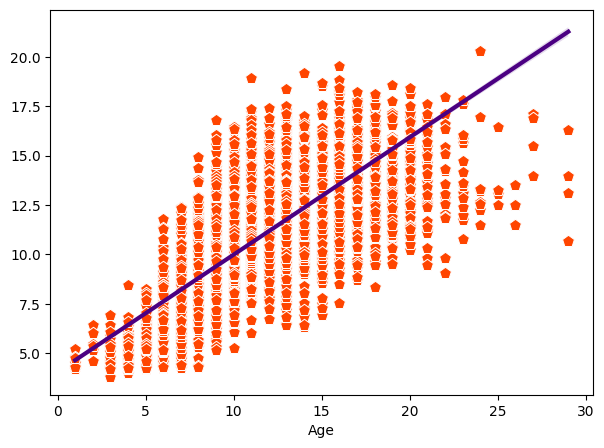

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=cat_pred,color="indigo",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=cat_pred,color="orangered",marker="p",s=80)

plt.show()

# All Model Result Comparison

In [ ]:
all_mse_score = [mse, mse1, mse3, mse5, mse6]
all_mae_score = [mae, mae1, mae3, mae5, mae6]
all_r2_score = [r2, r21, r23, r25, r26]
all_model = ['ln_model', 'random_regr', 'xgb', 'lgb_model', 'cat_model']

data = {'Model': all_model,'MSE': all_mse_score,'MAE': all_mae_score,'R2_Score': all_r2_score}
df = pd.DataFrame(data)

df

,Model,MSE,MAE,R2_Score
0,ln_model,4.876540,1.532873,0.521512
1,random_regr,4.400940,1.465116,0.568178
2,xgb,4.258938,1.420414,0.582111
3,lgb_model,4.175620,1.411501,0.590287
4,cat_model,4.135949,1.406607,0.594179


<ipython-input-86-140a04eb662e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Model", x="R2_Score", data=df, palette="Dark2")


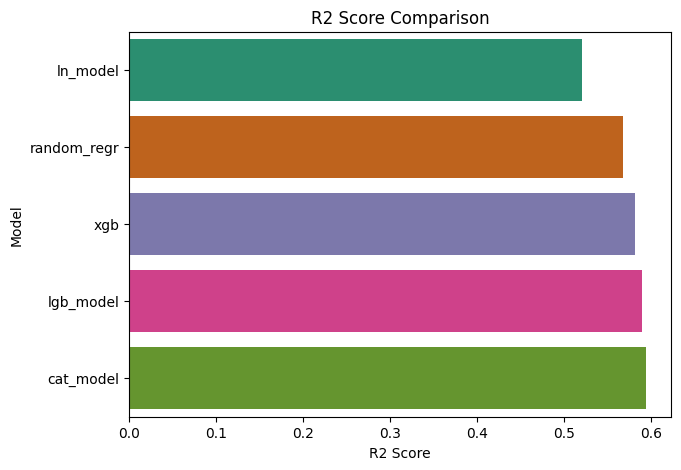

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="R2_Score", data=df, palette="Dark2")
plt.title('R2 Score Comparison')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()

<ipython-input-87-584578a62f27>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Model", x="MSE", data=df, palette="Set1")


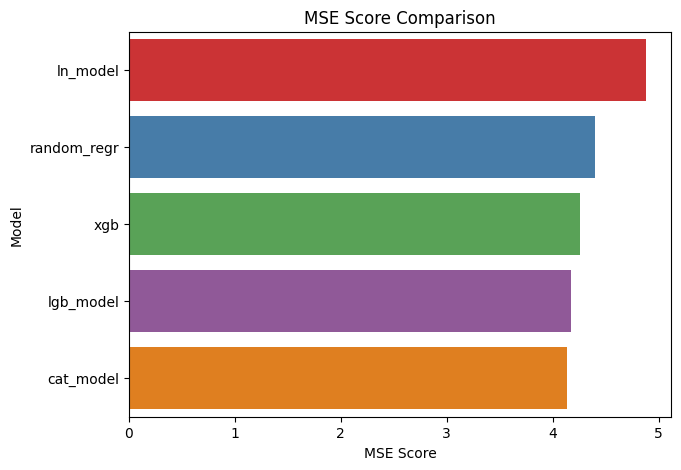

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="MSE", data=df, palette="Set1")
plt.title('MSE Score Comparison')
plt.xlabel('MSE Score')
plt.ylabel('Model')
plt.show()

<ipython-input-88-de1c65c41936>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Model", x="MAE", data=df, palette="tab10")


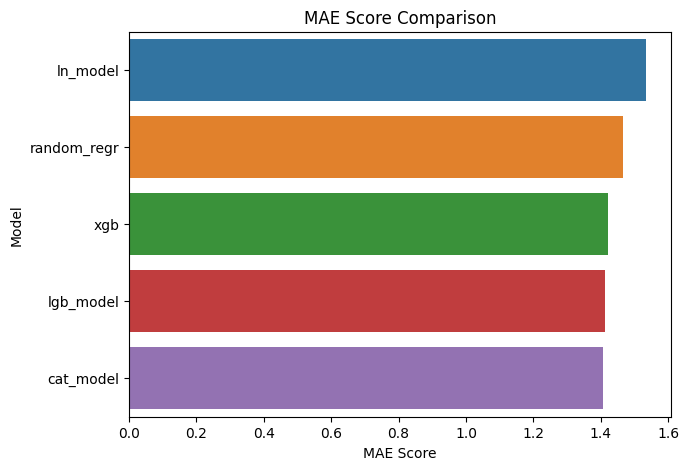

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="MAE", data=df, palette="tab10")
plt.title('MAE Score Comparison')
plt.xlabel('MAE Score')
plt.ylabel('Model')
plt.show()

RIDGE REGRESSION AND LASSO REGRESSION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression MSE:", mean_squared_error(Y_test, y_pred_ridge))
print("Ridge Regression R^2:", r2_score(Y_test, y_pred_ridge))


Ridge Regression MSE: 4.9100887979876
Ridge Regression R^2: 0.5182204206828226


In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression MSE:", mean_squared_error(Y_test, y_pred_lasso))
print("Lasso Regression R^2:", r2_score(Y_test, y_pred_lasso))


Lasso Regression MSE: 5.195722030020455
Lasso Regression R^2: 0.4901939910133234


Fine tuning the parameters for Ridge and Lasso regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Ridge
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, Y_train)

print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge MSE:", -ridge_grid.best_score_)

# Lasso
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, Y_train)

print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso MSE:", -lasso_grid.best_score_)

Best Ridge alpha: {'alpha': 1}
Best Ridge MSE: 4.8748637827925565
Best Lasso alpha: {'alpha': 0.01}
Best Lasso MSE: 4.943686326437844


after fine tuning

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression MSE:", mean_squared_error(Y_test, y_pred_ridge))
print("Ridge Regression R^2:", r2_score(Y_test, y_pred_ridge))
print("Mean Absolute Error:", mean_absolute_error(Y_test,y_pred_ridge))

Ridge Regression MSE: 4.9100887979876
Ridge Regression R^2: 0.5182204206828226
Mean Absolute Error: 1.5315271474230878


In [ ]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, Y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression MSE:", mean_squared_error(Y_test, y_pred_lasso))
print("Lasso Regression R^2:", r2_score(Y_test, y_pred_lasso))
print("Mean Absolute Error:", mean_absolute_error(Y_test,y_pred_lasso))

Lasso Regression MSE: 5.009194942460038
Lasso Regression R^2: 0.5084960921510763
Mean Absolute Error: 1.5462181234952526


# Parameter Tuning

Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {'fit_intercept': [True, False]}

# Instantiate the model
lr = LinearRegression()

# Random search
random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=2, cv=5, random_state=42)
random_search.fit(X_train, Y_train)

# Best parameters and score
print("Best parameters (Linear Regression):", random_search.best_params_)
print("Best score (Linear Regression):", random_search.best_score_)


Best parameters (Linear Regression): {'fit_intercept': True}
Best score (Linear Regression): 0.5107043939643964


Random forest regressor

In [ ]:
pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the function to optimize
def rf_evaluate(n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap):
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        bootstrap=bool(int(bootstrap)),
        random_state=42
    )

    # 5-fold cross-validation
    scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
    return np.mean(scores)

# Define the parameter space
param_bounds = {
    'n_estimators': (50, 200),
    'max_depth': (5, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'bootstrap': (0, 1)  # Binary, 0=False, 1=True
}

# Initialize optimizer
optimizer = BayesianOptimization(f=rf_evaluate, pbounds=param_bounds, random_state=42)

# Maximize
optimizer.maximize(init_points=5, n_iter=25)

# Best parameters and score
print("Best parameters (RandomForestRegressor):", optimizer.max['params'])
print("Best score (RandomForestRegressor):", optimizer.max['target'])


|   iter    |  target   | bootstrap | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | -6.836    | 0.3745    | 28.77     | 3.196     | 6.789     | 73.4      |
| 2         | -4.675    | 0.156     | 6.452     | 3.599     | 6.809     | 156.2     |
| 3         | -6.837    | 0.02058   | 29.25     | 3.497     | 3.699     | 77.27     |
| 4         | -5.232    | 0.1834    | 12.61     | 2.574     | 5.456     | 93.68     |
| 5         | -4.575    | 0.6119    | 8.487     | 1.876     | 4.931     | 118.4     |
| 6         | -4.47     | 1.0       | 30.0      | 1.0       | 2.0       | 199.2     |
| 7         | -4.83     | 0.0       | 5.0       | 1.0       | 10.0      | 200.0     |
| 8         | -4.32     | 1.0       | 30.0      | 4.0       | 10.0      | 166.9     |
| 9         | -8.019    | 0.0       | 30.0      | 1.0       | 2.0       | 140.1     |
| 10        | -6.459    | 0.8425    | 19.02     | 3.36

XGB Regressor

In [ ]:
from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the function to optimize
def xgb_evaluate(n_estimators, learning_rate, max_depth, subsample, colsample_bytree):
    model = XGBRegressor(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
    return np.mean(scores)

# Define the parameter space
param_bounds = {
    'n_estimators': (50, 500),
    'learning_rate': (0.01, 0.2),
    'max_depth': (3, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Initialize optimizer
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)

# Maximize
optimizer.maximize(init_points=5, n_iter=25)

# Best parameters and score
print("Best parameters (XGBRegressor):", optimizer.max['params'])
print("Best score (XGBRegressor):", optimizer.max['target'])

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | -4.791    | 0.7498    | 0.1906    | 8.124     | 319.4     | 0.6624    |
| 2         | -4.216    | 0.6624    | 0.02104   | 9.063     | 320.5     | 0.8832    |
| 3         | -4.509    | 0.6082    | 0.1943    | 8.827     | 145.6     | 0.6727    |
| 4         | -4.216    | 0.6734    | 0.06781   | 6.673     | 244.4     | 0.7165    |
| 5         | -4.211    | 0.8447    | 0.0365    | 5.045     | 214.9     | 0.7824    |
| 6         | -4.238    | 0.8653    | 0.02397   | 5.058     | 214.8     | 0.8099    |
| 7         | -4.261    | 0.6       | 0.1881    | 4.882     | 215.8     | 0.6       |
| 8         | -4.319    | 0.6       | 0.2       | 5.897     | 215.3     | 0.6       |
| 9         | -4.26     | 0.6       | 0.2       | 4.133     | 215.0     | 0.6       |
| 10        | -4.288    | 0.6028    | 0.01      | 9.70

CatBoost Reggressor

In [ ]:
from bayes_opt import BayesianOptimization
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the function to optimize
def cat_evaluate(iterations, learning_rate, depth, l2_leaf_reg):
    model = CatBoostRegressor(
        iterations=int(iterations),
        learning_rate=learning_rate,
        depth=int(depth),
        l2_leaf_reg=l2_leaf_reg,
        verbose=0
    )

    scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
    return np.mean(scores)

# Define the parameter space
param_bounds = {
    'iterations': (100, 500),
    'learning_rate': (0.01, 0.2),
    'depth': (4, 10),
    'l2_leaf_reg': (1, 5)
}

# Initialize optimizer
optimizer = BayesianOptimization(f=cat_evaluate, pbounds=param_bounds, random_state=42)

# Maximize
optimizer.maximize(init_points=5, n_iter=25)

# Best parameters and score
print("Best parameters (CatBoostRegressor):", optimizer.max['params'])
print("Best score (CatBoostRegressor):", optimizer.max['target'])

|   iter    |  target   |   depth   | iterat... | l2_lea... | learni... |
-------------------------------------------------------------------------
| 1         | -4.2      | 6.247     | 480.3     | 3.928     | 0.1237    |
| 2         | -4.236    | 4.936     | 162.4     | 1.232     | 0.1746    |
| 3         | -4.27     | 7.607     | 383.2     | 1.082     | 0.1943    |
| 4         | -4.268    | 8.995     | 184.9     | 1.727     | 0.04485   |
| 5         | -4.229    | 5.825     | 309.9     | 2.728     | 0.06533   |
| 6         | -4.224    | 6.606     | 481.2     | 3.878     | 0.1857    |
| 7         | -4.209    | 5.504     | 479.7     | 4.621     | 0.1483    |
| 8         | -4.419    | 6.459     | 478.9     | 3.044     | 0.01      |
| 9         | -4.218    | 5.834     | 480.6     | 4.61      | 0.194     |
| 10        | -4.484    | 5.2       | 480.7     | 3.636     | 0.01      |
| 11        | -4.248    | 9.166     | 184.9     | 1.652     | 0.1579    |
| 12        | -4.207    | 6.257     | 

LGBMRegressor

In [ ]:
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the function to optimize
def lgb_evaluate(n_estimators, learning_rate, num_leaves, max_depth):
    model = LGBMRegressor(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        num_leaves=int(num_leaves),
        max_depth=int(max_depth),
        random_state=42
    )

    scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
    return np.mean(scores)

# Define the parameter space
param_bounds = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.2),
    'num_leaves': (31, 100),
    'max_depth': (3, 10)
}

# Initialize optimizer
optimizer = BayesianOptimization(f=lgb_evaluate, pbounds=param_bounds, random_state=42)

# Maximize
optimizer.maximize(init_points=5, n_iter=25)

# Best parameters and score
print("Best parameters (LGBMRegressor):", optimizer.max['params'])
print("Best score (LGBMRegressor):", optimizer.max['target'])


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import warnings
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the function to optimize
def lgb_evaluate(n_estimators, learning_rate, num_leaves, max_depth):
    model = LGBMRegressor(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        num_leaves=int(num_leaves),
        max_depth=int(max_depth),
        random_state=42,
        verbosity=-1  # Suppress LightGBM warnings
    )

    scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
    return np.mean(scores)

# Define the parameter space
param_bounds = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.2),
    'num_leaves': (31, 100),
    'max_depth': (3, 10)
}

# Initialize optimizer
optimizer = BayesianOptimization(f=lgb_evaluate, pbounds=param_bounds, random_state=42)

# Maximize
optimizer.maximize(init_points=5, n_iter=25)

# Best parameters and score
print("Best parameters (LGBMRegressor):", optimizer.max['params'])
print("Best score (LGBMRegressor):", optimizer.max['target'])


|   iter    |  target   | learni... | max_depth | n_esti... | num_le... |
-------------------------------------------------------------------------
| 1         | -4.295    | 0.08116   | 9.655     | 392.8     | 72.31     |
| 2         | -4.312    | 0.03964   | 4.092     | 123.2     | 90.77     |
| 3         | -4.235    | 0.1242    | 7.957     | 108.2     | 97.92     |
| 4         | -4.206    | 0.1682    | 4.486     | 172.7     | 43.65     |
| 5         | -4.212    | 0.06781   | 6.673     | 272.8     | 51.09     |
| 6         | -4.215    | 0.06705   | 7.448     | 143.2     | 97.93     |
| 7         | -4.389    | 0.1876    | 8.778     | 258.0     | 62.64     |
| 8         | -4.367    | 0.1934    | 6.333     | 374.1     | 97.06     |
| 9         | -4.301    | 0.1089    | 6.87      | 499.1     | 54.07     |
| 10        | -4.217    | 0.1181    | 5.54      | 281.4     | 32.8      |
| 11        | -4.386    | 0.188     | 8.254     | 215.9     | 91.02     |
| 12        | -4.209    | 0.174     | 

MODELS AFTER PARAMETER TUNING

Linear regression

In [ ]:
ln_model = LinearRegression(fit_intercept=True)
ln_model.fit(X_train, Y_train)

LinearRegression()

MSE,MAE,R2_SCORE_LinearRegressionModel

In [ ]:
ln_pred=ln_model.predict(X_test)
mse = mean_squared_error(Y_test,ln_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(Y_test,ln_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(Y_test,ln_pred)
print("R2 Score:", r2)

Mean Squared Error: 4.876539931664907
Mean Absolute Error: 1.5328734406377826
R2 Score: 0.5215122468327161


RandomForestRegressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Correct the hyperparameters
params = {
    'bootstrap': True,  # Boolean value, not float
    'max_depth': int(11.02334829439182),  # Should be an integer
    'min_samples_leaf': int(4.0),  # Should be an integer
    'min_samples_split': int(9.193158680091239),  # Should be an integer
    'n_estimators': int(125.84379466965744)  # Should be an integer
}

# Initialize the RandomForestRegressor with these parameters
rf_model = RandomForestRegressor(**params)

# Fit the model
rf_model.fit(X_train, Y_train)


RandomForestRegressor(max_depth=11, min_samples_leaf=4, min_samples_split=9,
                      n_estimators=125)

MSE,MAE,R2 Score_RandomForestRegressor

In [ ]:
rfr_pred=rf_model.predict(X_test)
mse1 = mean_squared_error(Y_test,rfr_pred)
print("Mean Squared Error:", mse1)
mae1= mean_absolute_error(Y_test,rfr_pred)
print("Mean Absolute Error:", mae1)
r21 = r2_score(Y_test,rfr_pred)
print("R2 Score:", r21)

Mean Squared Error: 4.209489627841761
Mean Absolute Error: 1.4141008894485776
R2 Score: 0.5869634490372515


XGBRegressor Model

In [ ]:
from xgboost import XGBRegressor

# Correct the hyperparameters
params = {
    'colsample_bytree': 0.6833149296885029,
    'learning_rate': 0.03880498039109571,
    'max_depth': int(7.748953326138044),  # Should be an integer
    'n_estimators': int(244.53928595287186),  # Should be an integer
    'subsample': 0.8879515790869158
}

# Initialize the XGBRegressor with the provided hyperparameters
xgb = XGBRegressor(**params)

# Fit the model
xgb.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6833149296885029, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03880498039109571, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=244, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

MSE,MAE,R2 Score_XGBRegressor Model

In [ ]:
xgb_pred=xgb.predict(X_test)
mse3 = mean_squared_error(Y_test,xgb_pred)
print("Mean Squared Error:", mse3)
mae3= mean_absolute_error(Y_test,xgb_pred)
print("Mean Absolute Error:", mae3)
r23 = r2_score(Y_test,xgb_pred)
print("R2 Score:", r23)

Mean Squared Error: 4.139684108016074
Mean Absolute Error: 1.4045328768121745
R2 Score: 0.5938127040863037


LIGHT GBM REGRESSOR

In [ ]:
import lightgbm as lgb

# Updated parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse', 'mae'],
    'num_leaves': int(50.983786351441836),  # Should be an integer
    'learning_rate': 0.04240341035887028,
    'max_depth': int(6.346345559112615),  # Should be an integer
    'n_estimators': int(272.5998034488772),  # Should be an integer
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Preparing the dataset
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

# Callbacks for early stopping and logging evaluation
callbacks = [lgb.early_stopping(40), lgb.log_evaluation()]

# Training the model with the updated parameters
lgb_model = lgb.train(params, train_set=lgb_train, valid_sets=[lgb_train, lgb_eval], callbacks=callbacks)


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[1]	training's rmse: 3.09873	training's l1: 2.26406	valid_1's rmse: 3.11929	valid_1's l1: 2.28682
Training until validation scores don't improve for 40 rounds
[2]	training's rmse: 3.03202	training's l1: 2.21638	valid_1's rmse: 3.05177	valid_1's l1: 2.23775
[3]	training's rmse: 2.96861	training's l1: 2.17013	valid_1's rmse: 2.98762	valid_1's l1: 2.19036
[4]	training's rmse: 2.9095	training's l1: 2.12699	valid_1's rmse: 2.9278	valid_1's l1: 2.14592
[5]	training's rmse: 2.8528	training's l1: 2.08403	valid_1's rmse: 2.8702	valid_1's l1: 2.10179
[6]	training's rmse: 2.79956	training's l1: 2.04336	valid_1's rmse: 2.81599	valid_1's l1: 2.06016
[7]	training's rmse: 2.75337	training's l1: 2.00743	valid_1's rmse: 2.76944	valid_1's l1: 2.02381
[8]	training's rmse: 2.70917	training's l1: 1.97269	valid_1's rmse: 2.72481	valid_1's l1: 1.98864

MSE,MAE,R2 Score_Light GBM Regressor

In [ ]:
lgb_pred=lgb_model.predict(X_test)
mse5 = mean_squared_error(Y_test,lgb_pred)
print("Mean Squared Error:", mse5)
mae5= mean_absolute_error(Y_test,lgb_pred)
print("Mean Absolute Error:", mae5)
r25 = r2_score(Y_test,lgb_pred)
print("R2 Score:", r25)

Mean Squared Error: 4.137876486243075
Mean Absolute Error: 1.404239009185633
R2 Score: 0.593990154796043


CatBoost Regressor

In [ ]:
from catboost import CatBoostRegressor

# Updated parameters
params = {
    'iterations': int(480.2857225639665),  # Should be an integer
    'depth': int(6.2472407130841745),  # Should be an integer
    'l2_leaf_reg': 3.9279757672456204,  # Can remain as a float
    'learning_rate': 0.12374511199743694,  # Already a float
    'loss_function': 'RMSE',
    'random_seed': 42
}

# Initialize the CatBoostRegressor with the updated hyperparameters
cat_model = CatBoostRegressor(**params)

# Fit the model with early stopping and verbose logging
cat_model.fit(X_train, Y_train, eval_set=(X_test, Y_test), early_stopping_rounds=100, verbose=100)


0:	learn: 3.0033890	test: 3.0226863	best: 3.0226863 (0)	total: 102ms	remaining: 49s
100:	learn: 2.0407040	test: 2.0578310	best: 2.0577985 (98)	total: 2.82s	remaining: 10.6s
200:	learn: 1.9985664	test: 2.0411677	best: 2.0411677 (200)	total: 4.97s	remaining: 6.9s
300:	learn: 1.9692737	test: 2.0364937	best: 2.0364937 (300)	total: 7.71s	remaining: 4.59s
400:	learn: 1.9437984	test: 2.0363355	best: 2.0357814 (392)	total: 9.92s	remaining: 1.95s
479:	learn: 1.9273266	test: 2.0364165	best: 2.0356010 (436)	total: 12.2s	remaining: 0us

bestTest = 2.035600964
bestIteration = 436

Shrink model to first 437 iterations.


MSE,MAE,R2 Score_Cat boost regressor

In [ ]:
cat_pred=cat_model.predict(X_test)
mse6 = mean_squared_error(Y_test,cat_pred)
print("Mean Squared Error:", mse6)
mae6= mean_absolute_error(Y_test,cat_pred)
print("Mean Absolute Error:", mae6)
r26 = r2_score(Y_test,cat_pred)
print("R2 Score:", r26)

Mean Squared Error: 4.143671285753305
Mean Absolute Error: 1.406942782653136
R2 Score: 0.5934215671013743


after

In [ ]:
all_mse_score = [mse, mse1, mse3, mse5, mse6]
all_mae_score = [mae, mae1, mae3, mae5, mae6]
all_r2_score = [r2, r21, r23, r25, r26]
all_model = ['ln_model', 'random_regr', 'xgb', 'lgb_model', 'cat_model']

data = {'Model': all_model,'MSE': all_mse_score,'MAE': all_mae_score,'R2_Score': all_r2_score}
df = pd.DataFrame(data)

df

,Model,MSE,MAE,R2_Score
0,ln_model,4.876540,1.532873,0.521512
1,random_regr,4.209490,1.414101,0.586963
2,xgb,4.139684,1.404533,0.593813
3,lgb_model,4.137876,1.404239,0.593990
4,cat_model,4.143671,1.406943,0.593422


before

In [ ]:
all_mse_score = [mse, mse1, mse3, mse5, mse6]
all_mae_score = [mae, mae1, mae3, mae5, mae6]
all_r2_score = [r2, r21, r23, r25, r26]
all_model = ['ln_model', 'random_regr', 'xgb', 'lgb_model', 'cat_model']

data = {'Model': all_model,'MSE': all_mse_score,'MAE': all_mae_score,'R2_Score': all_r2_score}
df = pd.DataFrame(data)

df

,Model,MSE,MAE,R2_Score
0,ln_model,4.876540,1.532873,0.521512
1,random_regr,4.400940,1.465116,0.568178
2,xgb,4.258938,1.420414,0.582111
3,lgb_model,4.175620,1.411501,0.590287
4,cat_model,4.135949,1.406607,0.594179


difference

In [ ]:
ln_mse=4.876540-4.876540
rf_mse=4.400940-4.209490
xgb_mse=4.258938-4.139684
lgb_mse=4.175620-4.137876
cat_mse=4.135949-4.143671

In [ ]:
ln_mae=1.532873-1.532873
rf_mae=1.465116-1.414101
xgb_mae=1.420414-1.404533
lgb_mae=1.411501-1.404239
cat_mae=1.406607-1.406943

In [ ]:
ln_r2=0.521512-0.521512
rf_r2=0.568178-0.586963
xgb_r2=0.582111-0.593813
lgb_r2=0.590287-0.593990
cat_r2=0.594179-0.593422

In [ ]:
all_mse_score = [ln_mse,rf_mse,xgb_mse,lgb_mse,cat_mse]
all_mae_score = [ln_mae,rf_mae,xgb_mae,lgb_mae,cat_mae]
all_r2_score = [ln_r2,rf_r2,xgb_r2,lgb_r2,cat_r2]
all_model = ['ln_model', 'random_regr', 'xgb', 'lgb_model', 'cat_model']

data = {'Model': all_model,'MSE': all_mse_score,'MAE': all_mae_score,'R2_Score': all_r2_score}
df = pd.DataFrame(data)

df

,Model,MSE,MAE,R2_Score
0,ln_model,0.000000,0.000000,0.000000
1,random_regr,0.191450,0.051015,-0.018785
2,xgb,0.119254,0.015881,-0.011702
3,lgb_model,0.037744,0.007262,-0.003703
4,cat_model,-0.007722,-0.000336,0.000757


positive values indicate improvement in results and negative values indicate decline in results